# IPL DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
# import the data sets
matches = pd.read_csv("./IPL_dataset/matches.csv")
print(matches.head())

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

## Check Basic Info About Data

In [4]:
print("Shape os data \n", matches.shape , "\n")
print("Columns of data \n", matches.columns , "\n")
print("Basic Info of data \n", matches.info(), "\n")

Shape os data 
 (1095, 20) 

Columns of data 
 Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10

## Data Cleaning

In [3]:
# check the total null values 
total_null = matches.isna().sum()
print(total_null)

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [ ]:
# first fill out the city null values
matches["city"].fillna("Unknown",inplace=True)

# now delete the method column because we do not need of it
# matches.drop(columns=["method"],inplace=True)

# now delete the result_margin column because we do not need of it
# matches.drop(columns=["result_margin"],inplace=True)


# now fill out the player of the match with common values
matches["player_of_match"].fillna(matches["player_of_match"].mode()[0], inplace=True)


# fill out the winner columns
matches["winner"].fillna("Unknown", inplace=True)


# now fill out the target_runs with common values
matches["target_runs"].fillna(matches["target_runs"].mode()[0], inplace=True)


# now fill out the target_overs with common values
matches["target_overs"].fillna(matches["target_overs"].mode()[0], inplace=True)

In [21]:
# check the total null values 
total_null = matches.isna().sum()
print(total_null)

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64


### Graph

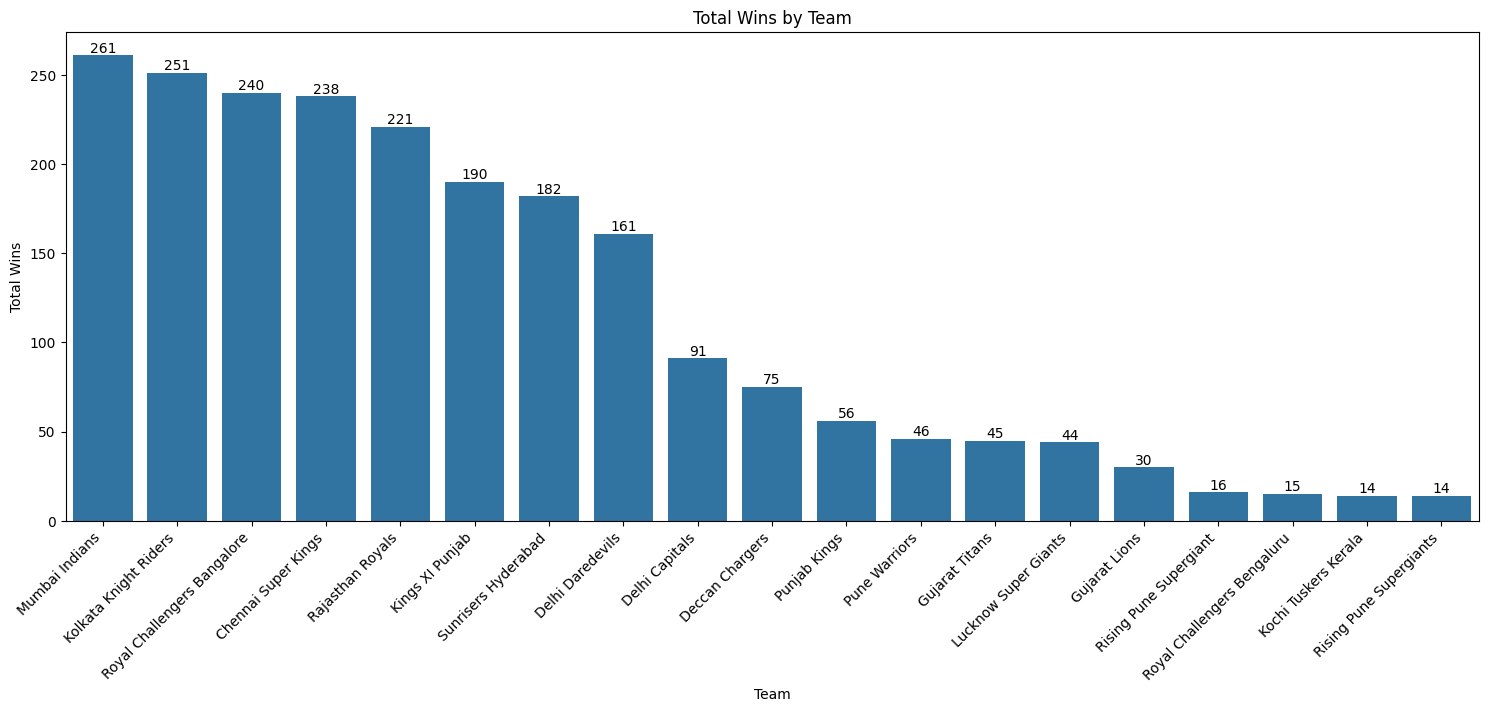

In [42]:
winnersTeam1 = matches.groupby(["team1"])["winner"].count().sort_values(ascending=False)
winnersTeam2 = matches.groupby(["team2"])["winner"].count().sort_values(ascending=False)
total_winners = (winnersTeam1 + winnersTeam2).sort_values(ascending=False)

plt.figure(figsize=(15, 7))  # Increase figure size
ax = sea.barplot(x=total_winners.index, y=total_winners.values)

for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=45, ha='right')  # Rotate and right-align labels
plt.tight_layout()
plt.xlabel("Team")
plt.ylabel("Total Wins")
plt.title("Total Wins by Team")

plt.show()

Text(0.5, 1.0, 'top 10 most player of the match')

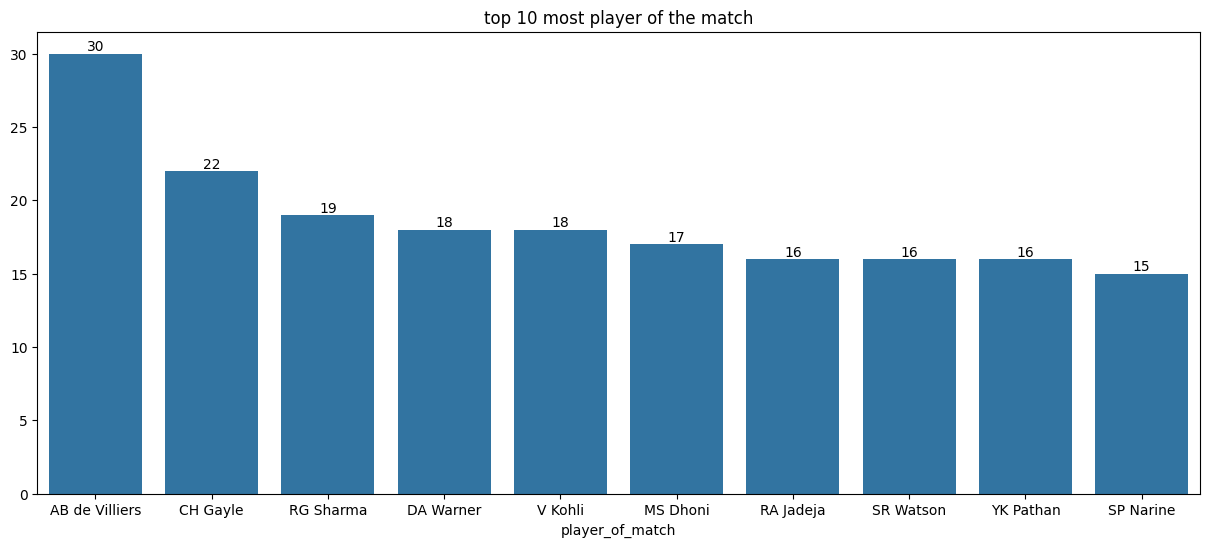

In [50]:
# top 10 most player of the match
player_of_match = matches["player_of_match"].value_counts().sort_values(ascending=False)[:10];
plt.figure(figsize=(15,6))
ax = sea.barplot(x=player_of_match.index , y=player_of_match.values)
for bar in ax.containers:
    ax.bar_label(bar)
plt.title("top 10 most player of the match")


Text(0.5, 1.0, 'Matches Played Per City Top 10')

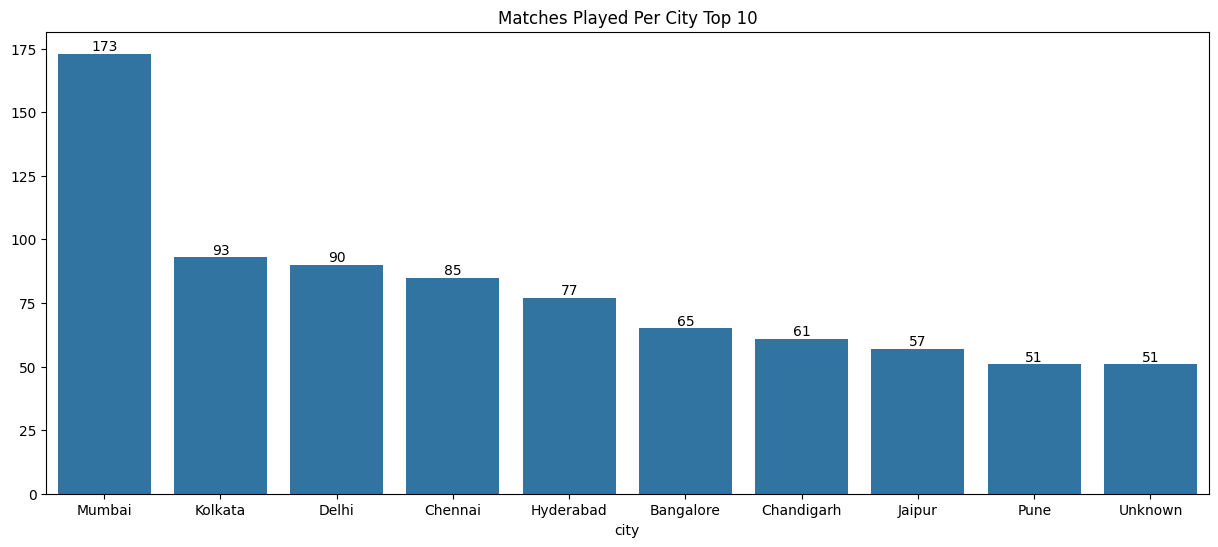

In [ ]:
# Matches Played Per City top 10
cities = matches["city"].value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(15,6))
ax = sea.barplot(x=cities.index , y=cities.values)
for bar in ax.containers:
    ax.bar_label(bar)

plt.title("Matches Played Per City Top 10")


/tmp/ipykernel_8931/3891726198.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.barplot(x=toss_decisions.index, y=toss_decisions.values, palette="Set2")


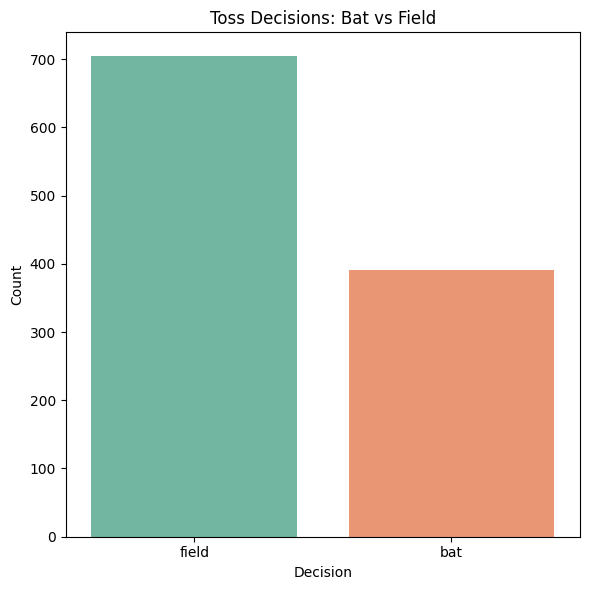

In [60]:
toss_decisions = matches['toss_decision'].value_counts()

plt.figure(figsize=(6, 6))
sea.barplot(x=toss_decisions.index, y=toss_decisions.values, palette="Set2")
plt.title("Toss Decisions: Bat vs Field")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
